In [1]:
#3.1 
import pandas as pd

# 读取CSV文件，选择特定列
df = pd.read_csv('ibtracs.ALL.list.v04r00.csv')

# 确保列名没有多余空格
df.columns = df.columns.str.strip()

# 将风速 (WMO_WIND) 转为数值类型
df['WMO_WIND'] = pd.to_numeric(df['WMO_WIND'], errors='coerce')

# 删除缺失值
df.dropna(subset=['WMO_WIND'], inplace=True)

# 按SID分组，并选择风速最大的风暴记录，然后根据风速获取前10个最大的飓风
top_10_hurricanes = df.groupby('SID').apply(lambda x: x.loc[x['WMO_WIND'].idxmax()]).nlargest(10, 'WMO_WIND')[['NAME', 'WMO_WIND']]

print(top_10_hurricanes)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_14996\1093619774.py:5: DtypeWarning: Columns (1,2,8,9,14,19,20,161,162) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('ibtracs.ALL.list.v04r00.csv')


                    NAME  WMO_WIND
SID                               
2015293N13266   PATRICIA     185.0
1980214N11330      ALLEN     165.0
1935241N23291  NOT_NAMED     160.0
1988253N12306    GILBERT     160.0
1997253N12255      LINDA     160.0
2005289N18282      WILMA     160.0
2019236N10314     DORIAN     160.0
1998295N12284      MITCH     155.0
2005261N21290       RITA     155.0
2009288N07267       RICK     155.0


C:\Users\Administrator\AppData\Local\Temp\ipykernel_14996\1093619774.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_10_hurricanes = df.groupby('SID').apply(lambda x: x.loc[x['WMO_WIND'].idxmax()]).nlargest(10, 'WMO_WIND')[['NAME', 'WMO_WIND']]


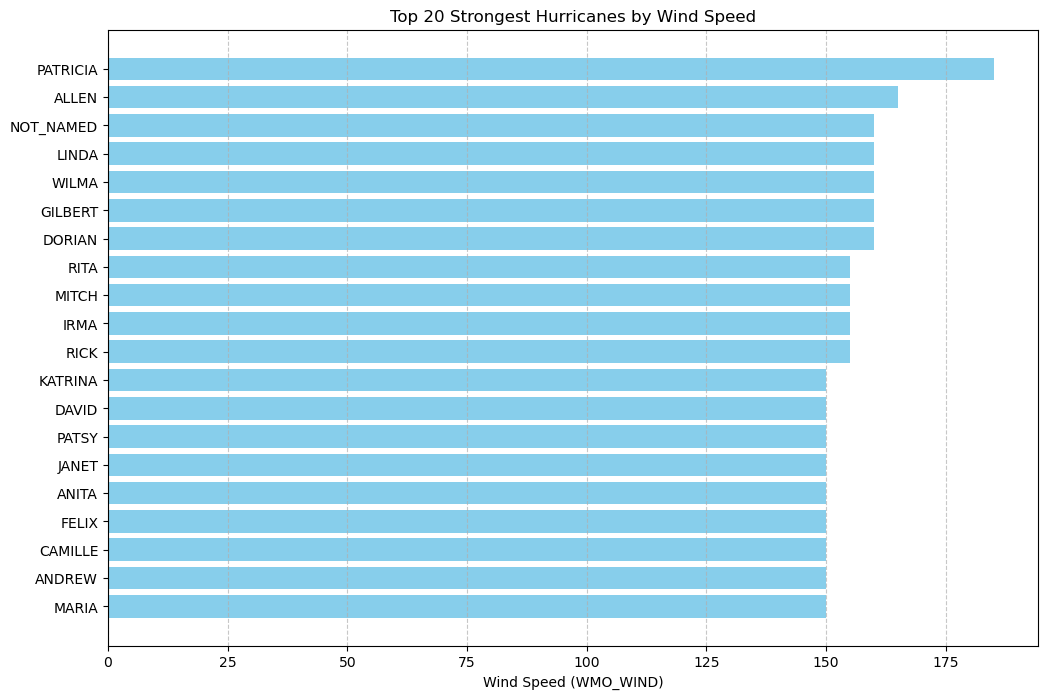

In [2]:
#3.2 
import matplotlib.pyplot as plt
# 确保 WMO_WIND 列是数值型以便进行比较
df['WMO_WIND'] = pd.to_numeric(df['WMO_WIND'], errors='coerce')

# 移除缺少 WMO_WIND 的行
df = df.dropna(subset=['WMO_WIND'])

# 获取风速最大的20个飓风
top_20_hurricanes = df.sort_values(by='WMO_WIND', ascending=False).drop_duplicates(subset='SID').nlargest(21, 'WMO_WIND')

# 绘制条形图
plt.figure(figsize=(12, 8))
plt.barh(top_20_hurricanes['NAME'], top_20_hurricanes['WMO_WIND'], color='skyblue')
plt.xlabel('Wind Speed (WMO_WIND)')
plt.title('Top 20 Strongest Hurricanes by Wind Speed')
# 反转Y轴使风速最大值位于顶部
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

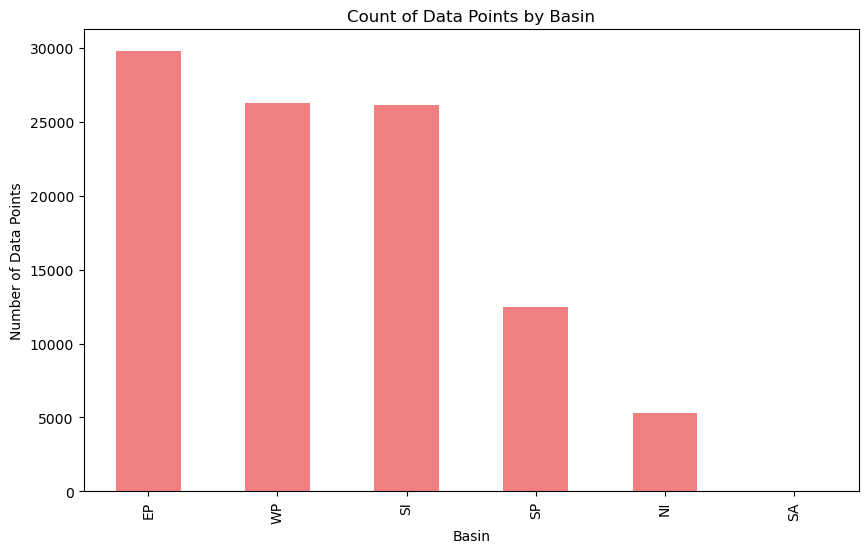

In [20]:
# 3.3
# 统计盆地的数据点数量
basin_counts = df['BASIN'].value_counts()

# 绘制盆地的条形图
plt.figure(figsize=(10, 6))
basin_counts.plot(kind='bar', color='lightcoral')
plt.xlabel('Basin')
plt.ylabel('Number of Data Points')
plt.title('Count of Data Points by Basin')
plt.show()

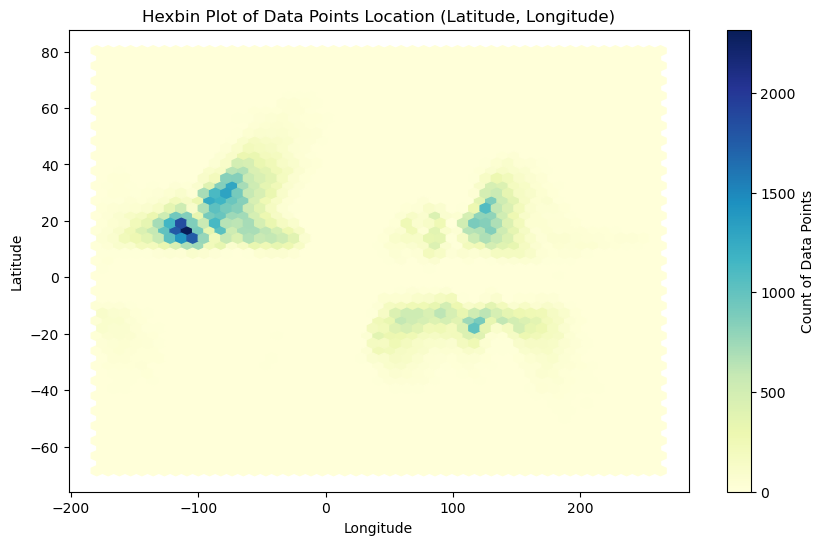

In [30]:
# 3.4
# 将 'LON' 和 'LAT' 列转换为数值类型，并处理非数值的数据
df['LON'] = pd.to_numeric(df['LON'], errors='coerce')
df['LAT'] = pd.to_numeric(df['LAT'], errors='coerce')

# 删除包含 NaN 的行
df = df.dropna(subset=['LON', 'LAT'])

# 绘制六边形热图
plt.figure(figsize=(10, 6))
plt.hexbin(df['LON'], df['LAT'], gridsize=50, cmap='YlGnBu')
plt.colorbar(label='Count of Data Points')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Hexbin Plot of Data Points Location (Latitude, Longitude)')
plt.show()

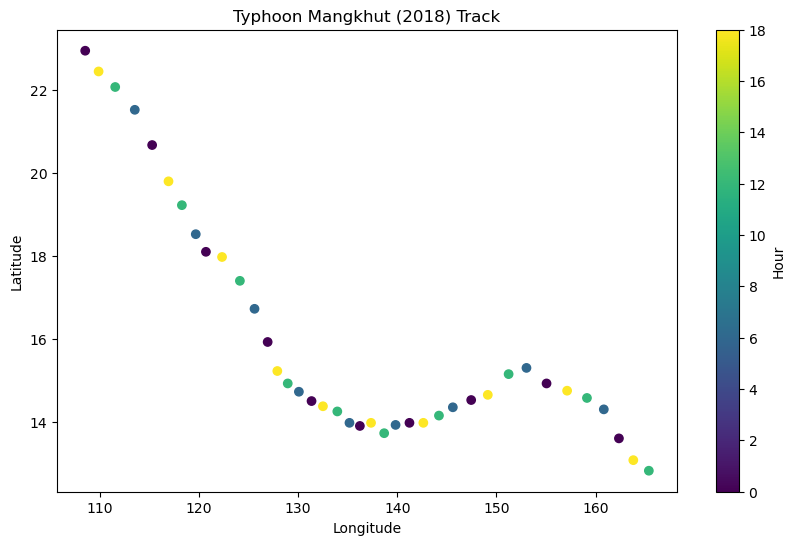

In [31]:
# 3.5
# 将 'ISO_TIME' 列转换为 datetime 类型
df['ISO_TIME'] = pd.to_datetime(df['ISO_TIME'], errors='coerce')

# 过滤出台风 Mangkhut 的数据
mangkhut_data = df[(df['NAME'] == 'MANGKHUT') & (df['ISO_TIME'].dt.year == 2018)]

# 绘制台风轨迹
plt.figure(figsize=(10, 6))
plt.scatter(mangkhut_data['LON'], mangkhut_data['LAT'], c=mangkhut_data['ISO_TIME'].dt.hour, cmap='viridis')
plt.colorbar(label='Hour')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Typhoon Mangkhut (2018) Track')
plt.show()

In [32]:
# 3.6
# 确保将 'ISO_TIME' 列转换为 datetime 类型
df['ISO_TIME'] = pd.to_datetime(df['ISO_TIME'], errors='coerce')
# 过滤出1970年以后的西北太平洋（WP）和东北太平洋（EP）数据
filtered_df = df[(df['ISO_TIME'].dt.year >= 1970) & (df['BASIN'].isin(['WP', 'EP']))]
# 查看过滤后的数据
print(filtered_df.head())

                  SID SEASON NUMBER BASIN SUBBASIN   NAME            ISO_TIME  \
351441  1970151N11261   1970     46    EP       MM  ADELE 1970-05-30 12:00:00   
351443  1970151N11261   1970     46    EP       MM  ADELE 1970-05-30 18:00:00   
351445  1970151N11261   1970     46    EP       MM  ADELE 1970-05-31 00:00:00   
351447  1970151N11261   1970     46    EP       MM  ADELE 1970-05-31 06:00:00   
351449  1970151N11261   1970     46    EP       MM  ADELE 1970-05-31 12:00:00   

       NATURE      LAT      LON  ...  BOM_GUST_PER REUNION_GUST  \
351441     TS  11.1000  -98.600  ...                              
351443     TS  11.0906  -99.301  ...                              
351445     TS  11.0000  -99.900  ...                              
351447     TS  10.9084 -100.390  ...                              
351449     TS  10.9000 -100.900  ...                              

       REUNION_GUST_PER USA_SEAHGT USA_SEARAD_NE USA_SEARAD_SE USA_SEARAD_SW  \
351441                        

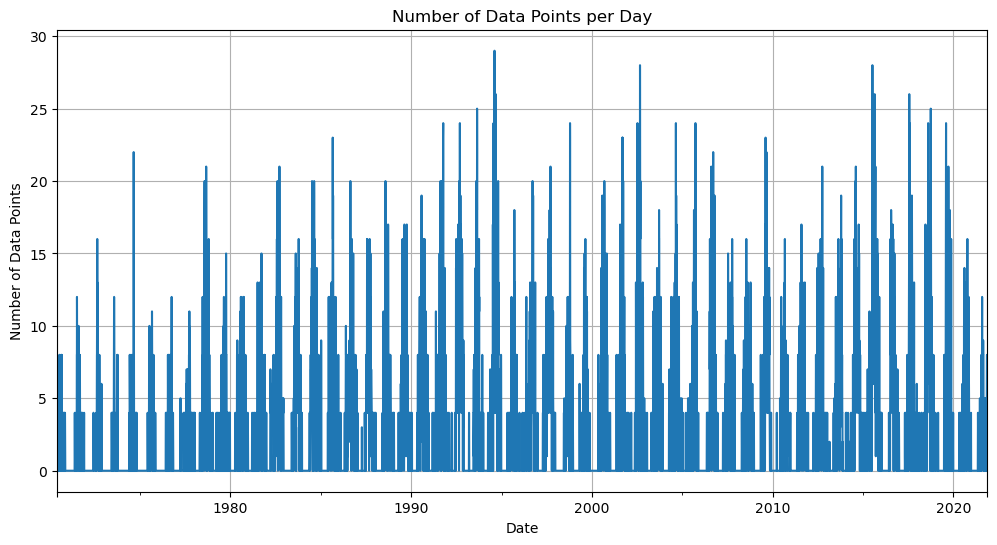

In [33]:
# 3.7
# 按天统计数据点数量
daily_counts = filtered_df.resample('D', on='ISO_TIME').size()

# 绘制数据点数量的时间序列图
plt.figure(figsize=(12, 6))
daily_counts.plot()
plt.xlabel('Date')
plt.ylabel('Number of Data Points')
plt.title('Number of Data Points per Day')
plt.grid(True)
plt.show()

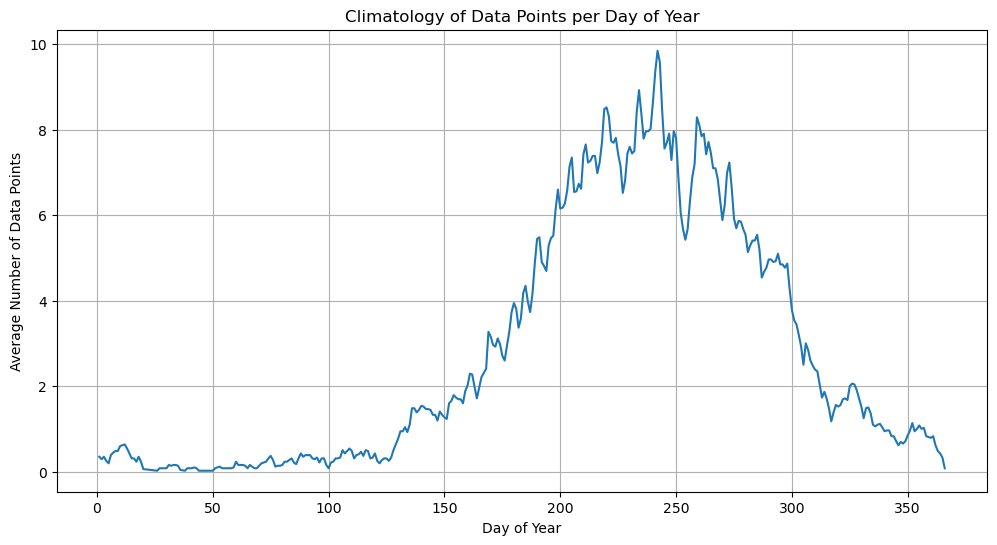

In [34]:
# 3.8
# 显式创建副本以避免修改原始数据框
filtered_df = filtered_df.copy()
filtered_df['DayOfYear'] = filtered_df['ISO_TIME'].dt.dayofyear

# 按 day of year 计算气候学（平均）数据点数量
climatology = filtered_df.groupby('DayOfYear').size() / len(filtered_df['ISO_TIME'].dt.year.unique())

# 绘制气候学图
climatology.plot(figsize=(12, 6))
plt.title('Climatology of Data Points per Day of Year')
plt.xlabel('Day of Year')
plt.ylabel('Average Number of Data Points')
plt.grid(True)
plt.show()

                    WMO_WIND
ISO_TIME                    
1842-10-25 03:00:00         
1842-10-25 06:00:00         
1842-10-25 09:00:00         
1842-10-25 12:00:00         
1842-10-25 15:00:00         


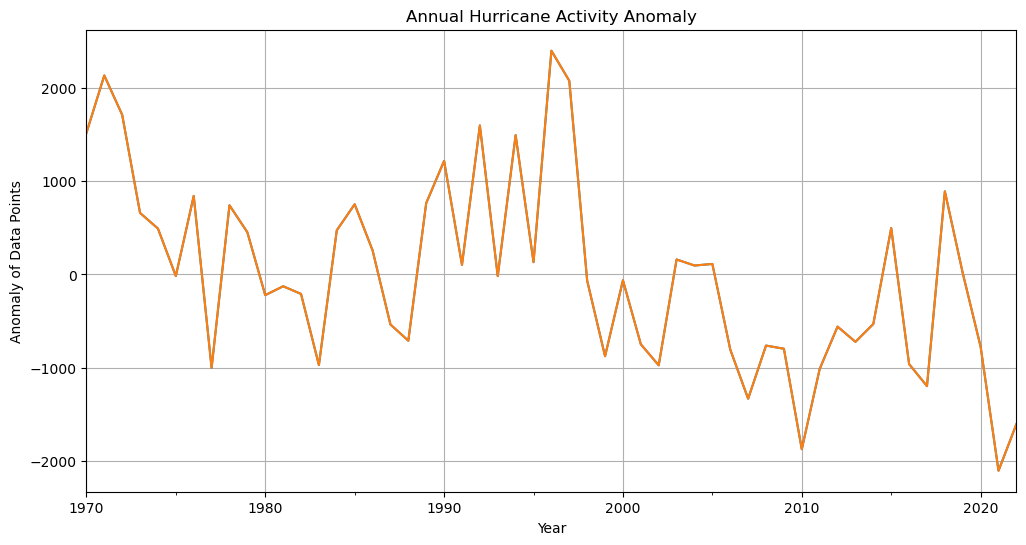

In [13]:
# 3.9
# 假设日期格式为 'YYYY-MM-DD HH:MM:SS' 或类似形式
df = pd.read_csv('ibtracs.ALL.list.v04r00.csv', usecols=['ISO_TIME', 'WMO_WIND'])
# 使用明确的日期格式
df['ISO_TIME'] = pd.to_datetime(df['ISO_TIME'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

# 删除日期列中含有 NaT（缺失值）的行
df = df.dropna(subset=['ISO_TIME'])

# 设置日期为索引
df.set_index('ISO_TIME', inplace=True)

# 查看数据框的前几行
print(df.head())

# 过滤数据，只包含 1970 年之后的记录
df_filtered = df[df.index.year >= 1970]

# 计算每日的计数
daily_counts = df_filtered.resample('D').size()

# 计算基准气候学平均值（以每年的每天作为基准）
climatology = daily_counts.groupby(daily_counts.index.dayofyear).mean()

# 计算异常值
anomaly = daily_counts.groupby(daily_counts.index.dayofyear).transform(lambda x: x - climatology.loc[x.name])

# 3.10
# 按年重新采样异常值
annual_anomaly = anomaly.resample('YE').sum()

# 绘制年际异常变化图
annual_anomaly.plot(figsize=(12, 6))
annual_anomaly.plot()
plt.title('Annual Hurricane Activity Anomaly')
plt.xlabel('Year')
plt.ylabel('Anomaly of Data Points')
plt.grid(True)
plt.show()